## **Donald Trump and Kamala Harris Sentiment Analysis**

In [26]:
from IPython.display import Markdown, display

# Define the introduction text
introduction_text = """
# **Introduction**

In this project, I aim to analyze the sentiment expressed in tweets about two prominent public figures, **Donald Trump** and **Kamala Harris**, during a specific period. Social media platforms, especially Twitter, are rich sources of public opinion and sentiment, and analyzing this data provides valuable insights into public perception, polarizing debates, and overall trends in public sentiment.

## **Problem Statement**
The primary goal of this analysis is to:
1. **Understand the sentiment distribution** (positive, neutral, and negative) across tweets related to Trump and Harris.
2. **Compare the public perception** of these two figures during the specified time period.
3. **Identify patterns or trends over time**, particularly during significant events such as debates.
4. **Extract insights from tweet content**, focusing on frequently mentioned positive and negative words.

## **Approach**
1. **Data Cleaning**: Tweets are cleaned to remove noise, including hashtags, mentions, and URLs, ensuring accurate sentiment analysis.
2. **Sentiment Analysis**: The cleaned tweets are processed using the VADER sentiment analysis tool to classify tweets into positive, neutral, and negative categories.
3. **Exploratory Data Analysis (EDA)**: Initial EDA is conducted to understand the structure and characteristics of the dataset.
4. **Visualizations**: Multiple visualizations, such as sentiment distribution histograms, pie charts, bar graphs, line charts, and word clouds, are used to interpret and present the findings effectively.

## **Key Questions**
- How does the public sentiment differ between Trump and Harris?
- What are the most common positive and negative words associated with each figure?
- Are there noticeable trends or shifts in sentiment over time?
- How do engagement metrics (e.g., likes, retweets) correlate with sentiment?

Through this analysis, I aim to provide a clear and concise overview of public opinion dynamics as captured on Twitter, uncovering key insights and patterns that can inform broader discussions.
"""

# Display the introduction as Markdown
display(Markdown(introduction_text))


# **Introduction**

In this project, I aim to analyze the sentiment expressed in tweets about two prominent public figures, **Donald Trump** and **Kamala Harris**, during a specific period. Social media platforms, especially Twitter, are rich sources of public opinion and sentiment, and analyzing this data provides valuable insights into public perception, polarizing debates, and overall trends in public sentiment.

## **Problem Statement**
The primary goal of this analysis is to:
1. **Understand the sentiment distribution** (positive, neutral, and negative) across tweets related to Trump and Harris.
2. **Compare the public perception** of these two figures during the specified time period.
3. **Identify patterns or trends over time**, particularly during significant events such as debates.
4. **Extract insights from tweet content**, focusing on frequently mentioned positive and negative words.

## **Approach**
1. **Data Cleaning**: Tweets are cleaned to remove noise, including hashtags, mentions, and URLs, ensuring accurate sentiment analysis.
2. **Sentiment Analysis**: The cleaned tweets are processed using the VADER sentiment analysis tool to classify tweets into positive, neutral, and negative categories.
3. **Exploratory Data Analysis (EDA)**: Initial EDA is conducted to understand the structure and characteristics of the dataset.
4. **Visualizations**: Multiple visualizations, such as sentiment distribution histograms, pie charts, bar graphs, line charts, and word clouds, are used to interpret and present the findings effectively.

## **Key Questions**
- How does the public sentiment differ between Trump and Harris?
- What are the most common positive and negative words associated with each figure?
- Are there noticeable trends or shifts in sentiment over time?
- How do engagement metrics (e.g., likes, retweets) correlate with sentiment?

Through this analysis, I aim to provide a clear and concise overview of public opinion dynamics as captured on Twitter, uncovering key insights and patterns that can inform broader discussions.


## 📌 Data Loading

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
trump_df = pd.read_csv('/Users/soniakhamitkar/Documents/Sentiment Analysis/data/trump_updated_debate.csv')  
harris_df = pd.read_csv('/Users/soniakhamitkar/Documents/Sentiment Analysis/data/harris_updated_debate.csv')

# Rename columns to match expected structure
expected_columns = ["User ID", "Tweet ID", "Tweet", "Created at", "Retweets", "Replies", "Likes", "Quotes", "Source"]
trump_df.columns = expected_columns
harris_df.columns = expected_columns

# Drop the unnecessary index column ('#') if present
for df in [trump_df, harris_df]:
    if "#" in df.columns:
        df.drop(columns=["#"], inplace=True)

def analyze_dataset(df, name):
    print(f"\n\n📊 **Dataset Overview for {name}**")
    df.info()
    print("\n")
    
    print(f"📌 **First Five Rows of {name} Dataset**")
    display(df.head())
    
    print(f"\n📌 **Missing Values per Column in {name} Dataset**")
    display(df.isnull().sum().to_frame(name="Missing Count"))
    
    duplicate_count = df.duplicated(subset=['Tweet']).sum()
    print(f"\n📌 **Number of Duplicate Tweets in {name} Dataset:** {duplicate_count}")
    
    print(f"\n📌 **Summary Statistics for {name} Dataset**")
    display(df.describe(include='all'))
    
    most_retweeted = df.loc[df['Retweets'].idxmax()]
    print(f"\n📌 **Most Retweeted Tweet in {name} Dataset:**")
    print(f"Tweet: {most_retweeted['Tweet']}")
    print(f"Retweets: {most_retweeted['Retweets']}")
    
    zero_likes_replies = df[(df['Likes'] == 0) & (df['Replies'] == 0)]
    zero_count = len(zero_likes_replies)
    print(f"\n📌 **Total Tweets with Zero Likes & Replies in {name} Dataset:** {zero_count}")
    
    unique_timestamps = df['Created at'].nunique()
    print(f"\n📌 **Number of Unique Timestamps in {name} Dataset:** {unique_timestamps}")
    
    most_common_timestamp = df['Created at'].mode()[0]
    print(f"\n📌 **Most Common Tweet Timestamp in {name} Dataset:** {most_common_timestamp}")

# Analyze Trump Dataset
analyze_dataset(trump_df, "Trump")

# Analyze Harris Dataset
analyze_dataset(harris_df, "Harris")



📊 **Dataset Overview for Trump**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4795 entries, 0 to 4794
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User ID     4795 non-null   int64  
 1   Tweet ID    4795 non-null   int64  
 2   Tweet       4795 non-null   object 
 3   Created at  4795 non-null   object 
 4   Retweets    4795 non-null   int64  
 5   Replies     4795 non-null   int64  
 6   Likes       4795 non-null   int64  
 7   Quotes      4795 non-null   int64  
 8   Source      0 non-null      float64
dtypes: float64(1), int64(6), object(2)
memory usage: 337.3+ KB


📌 **First Five Rows of Trump Dataset**


,User ID,Tweet ID,Tweet,Created at,Retweets,Replies,Likes,Quotes,Source
0,88236719,1833309413073162489,RT @Richard_ezio: I want to tell the truth abo...,2024-09-10 00:59:59+00:00,5150,0,0,0,NaN
1,1609990069590568961,1833309412720840970,"RT @RBReich: Over the weekend, Donald Trump th...",2024-09-10 00:59:59+00:00,4769,0,0,0,NaN
2,1535880797957238785,1833309412598903146,@The_Trump_Train YES,2024-09-10 00:59:59+00:00,0,0,3,0,NaN
3,182125474,1833309412544680222,RT @KamalaHQLies: THE LIE: Donald Trump called...,2024-09-10 00:59:59+00:00,509,0,0,0,NaN
4,1223775310166069249,1833309412506615986,RT @pesach_lattin: So the FBI agent who testif...,2024-09-10 00:59:59+00:00,8849,0,0,0,NaN



📌 **Missing Values per Column in Trump Dataset**


,Missing Count
User ID,0
Tweet ID,0
Tweet,0
Created at,0
Retweets,0
Replies,0
Likes,0
Quotes,0
Source,4795



📌 **Number of Duplicate Tweets in Trump Dataset:** 1476

📌 **Summary Statistics for Trump Dataset**


,User ID,Tweet ID,Tweet,Created at,Retweets,Replies,Likes,Quotes,Source
count,4.795000e+03,4.795000e+03,4795,4795,4795.000000,4795.000000,4795.000000,4795.000000,0.0
unique,NaN,NaN,3319,123,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,RT @elonmusk: While I don’t think the debate h...,2024-09-11 03:59:59+00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,23,100,NaN,NaN,NaN,NaN,NaN
mean,8.640978e+17,1.833664e+18,NaN,NaN,6758.611679,0.237539,1.847132,0.011053,NaN
std,7.244623e+17,2.092091e+14,NaN,NaN,12022.386893,10.654807,77.724795,0.416196,NaN
min,6.687300e+04,1.833309e+18,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,9.356570e+08,1.833491e+18,NaN,NaN,37.000000,0.000000,0.000000,0.000000,NaN
50%,1.023258e+18,1.833672e+18,NaN,NaN,1550.000000,0.000000,0.000000,0.000000,NaN
75%,1.556421e+18,1.833853e+18,NaN,NaN,8610.000000,0.000000,0.000000,0.000000,NaN



📌 **Most Retweeted Tweet in Trump Dataset:**
Tweet: RT @elonmusk: While I don’t think the debate hosts were fair to @realDonaldTrump, @KamalaHarris exceeded most people’s expectations tonight…
Retweets: 99476

📌 **Total Tweets with Zero Likes & Replies in Trump Dataset:** 4467

📌 **Number of Unique Timestamps in Trump Dataset:** 123

📌 **Most Common Tweet Timestamp in Trump Dataset:** 2024-09-11 01:59:59+00:00


📊 **Dataset Overview for Harris**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4791 entries, 0 to 4790
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User ID     4791 non-null   int64  
 1   Tweet ID    4791 non-null   int64  
 2   Tweet       4791 non-null   object 
 3   Created at  4791 non-null   object 
 4   Retweets    4791 non-null   int64  
 5   Replies     4791 non-null   int64  
 6   Likes       4791 non-null   int64  
 7   Quotes      4791 non-null   int64  
 8   Source      0 non-null      

,User ID,Tweet ID,Tweet,Created at,Retweets,Replies,Likes,Quotes,Source
0,88236719,1833309413073162489,RT @Richard_ezio: I want to tell the truth abo...,2024-09-10 00:59:59+00:00,5150,0,0,0,NaN
1,1181971448811986944,1833309412951281758,RT @JDVance: It has been 50 days since Kamala ...,2024-09-10 00:59:59+00:00,29649,0,0,0,NaN
2,30477815,1833309412867416555,"RT @RobSchneider: Good morning, friends.\nJust...",2024-09-10 00:59:59+00:00,22438,0,0,0,NaN
3,1521400102853967872,1833309412649537620,RT @JamesOKeefeIII: BREAKING: Google Growth St...,2024-09-10 00:59:59+00:00,22376,0,0,0,NaN
4,329687070,1833309412586299739,"RT @cmclymer: ""The Best People""\n\nThis is the...",2024-09-10 00:59:59+00:00,3065,0,0,0,NaN



📌 **Missing Values per Column in Harris Dataset**


,Missing Count
User ID,0
Tweet ID,0
Tweet,0
Created at,0
Retweets,0
Replies,0
Likes,0
Quotes,0
Source,4791



📌 **Number of Duplicate Tweets in Harris Dataset:** 1736

📌 **Summary Statistics for Harris Dataset**


,User ID,Tweet ID,Tweet,Created at,Retweets,Replies,Likes,Quotes,Source
count,4.791000e+03,4.791000e+03,4791,4791,4791.000000,4791.000000,4791.000000,4791.000000,0.0
unique,NaN,NaN,3055,160,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,RT @elonmusk: Vote for Kamala if you want this...,2024-09-11 17:59:59+00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,49,100,NaN,NaN,NaN,NaN,NaN
mean,9.358279e+17,1.833664e+18,NaN,NaN,7707.504488,0.233772,2.630349,0.016489,NaN
std,7.247021e+17,2.092158e+14,NaN,NaN,13776.805801,10.654590,88.922584,0.482187,NaN
min,8.196930e+05,1.833309e+18,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.566848e+09,1.833491e+18,NaN,NaN,95.500000,0.000000,0.000000,0.000000,NaN
50%,1.217823e+18,1.833657e+18,NaN,NaN,1939.000000,0.000000,0.000000,0.000000,NaN
75%,1.588570e+18,1.833845e+18,NaN,NaN,9985.000000,0.000000,0.000000,0.000000,NaN



📌 **Most Retweeted Tweet in Harris Dataset:**
Tweet: RT @elonmusk: Vote for Kamala if you want this to happen to your neighborhood!
Retweets: 98357

📌 **Total Tweets with Zero Likes & Replies in Harris Dataset:** 4512

📌 **Number of Unique Timestamps in Harris Dataset:** 160

📌 **Most Common Tweet Timestamp in Harris Dataset:** 2024-09-11 02:59:59+00:00


## 📌 Data Cleaning

In [30]:
import pandas as pd
import re
from IPython.display import display

# Function to clean tweet text by removing hashtags, mentions, and URLs
def clean_tweet_text(text):
    text = re.sub(r'@\w+', '', text)  # Remove mentions (@username)
    text = re.sub(r'#\w+', '', text)  # Remove hashtags (#hashtag)
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = text.strip()  # Remove leading and trailing spaces
    return text

# Load the original CSV files
trump_df = pd.read_csv('/Users/soniakhamitkar/Documents/Sentiment Analysis/data/trump_updated_debate.csv')  
harris_df = pd.read_csv('/Users/soniakhamitkar/Documents/Sentiment Analysis/data/harris_updated_debate.csv')

# Apply cleaning function to both datasets
trump_df['Cleaned_Tweet'] = trump_df['Tweet'].astype(str).apply(clean_tweet_text)
harris_df['Cleaned_Tweet'] = harris_df['Tweet'].astype(str).apply(clean_tweet_text)

# Display a sample of the cleaned datasets
print("Sample of the Cleaned Trump Tweets Dataset:")
display(trump_df[['Tweet', 'Cleaned_Tweet']].head().style.set_properties(**{'text-align': 'left'}))

print("\nSample of the Cleaned Harris Tweets Dataset:")
display(harris_df[['Tweet', 'Cleaned_Tweet']].head().style.set_properties(**{'text-align': 'left'}))

# Save the cleaned datasets to new CSV files
trump_df.to_csv('trump_cleaned.csv', index=False)
harris_df.to_csv('harris_cleaned.csv', index=False)

print("\nCleaning complete. Cleaned datasets saved as 'trump_cleaned.csv' and 'harris_cleaned.csv'.")

Sample of the Cleaned Trump Tweets Dataset:


,Tweet,Cleaned_Tweet
0,RT @Richard_ezio: I want to tell the truth about the media on the eve of the Trump-Harris debate so that no one will be surprised afterward…,RT : I want to tell the truth about the media on the eve of the Trump-Harris debate so that no one will be surprised afterward…
1,"RT @RBReich: Over the weekend, Donald Trump threatened to jail election officials and vowed ""bloody"" mass deportations. These are the plan…","RT : Over the weekend, Donald Trump threatened to jail election officials and vowed ""bloody"" mass deportations. These are the plan…"
2,@The_Trump_Train YES,YES
3,RT @KamalaHQLies: THE LIE: Donald Trump called abortion bans “a beautiful thing” and will ban abortion. THE TRUTH: Trump has said he will…,RT : THE LIE: Donald Trump called abortion bans “a beautiful thing” and will ban abortion. THE TRUTH: Trump has said he will…
4,RT @pesach_lattin: So the FBI agent who testified there was no link between Russia and the Trump campaign was arrested for working for Russ…,RT : So the FBI agent who testified there was no link between Russia and the Trump campaign was arrested for working for Russ…



Sample of the Cleaned Harris Tweets Dataset:


,Tweet,Cleaned_Tweet
0,RT @Richard_ezio: I want to tell the truth about the media on the eve of the Trump-Harris debate so that no one will be surprised afterward…,RT : I want to tell the truth about the media on the eve of the Trump-Harris debate so that no one will be surprised afterward…
1,RT @JDVance: It has been 50 days since Kamala Harris became the presumptive nominee of the Democratic Party. In the dead of night yesterd…,RT : It has been 50 days since Kamala Harris became the presumptive nominee of the Democratic Party. In the dead of night yesterd…
2,"RT @RobSchneider: Good morning, friends. Just a reminder that the Biden/Harris Administration only gave a measly $700 dollars to Maui Fire…","RT : Good morning, friends. Just a reminder that the Biden/Harris Administration only gave a measly $700 dollars to Maui Fire…"
3,"RT @JamesOKeefeIII: BREAKING: Google Growth Strategist Exposes Google’s Search Engine Manipulation for Kamala Harris Campaign, Revenue-Driv…","RT : BREAKING: Google Growth Strategist Exposes Google’s Search Engine Manipulation for Kamala Harris Campaign, Revenue-Driv…"
4,"RT @cmclymer: ""The Best People"" This is the ad that Vice President Harris's campaign will be airing on Fox News tomorrow before the debate…","RT : ""The Best People"" This is the ad that Vice President Harris's campaign will be airing on Fox News tomorrow before the debate…"



Cleaning complete. Cleaned datasets saved as 'trump_cleaned.csv' and 'harris_cleaned.csv'.


In [32]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


## 📌 Sentiment Histogram

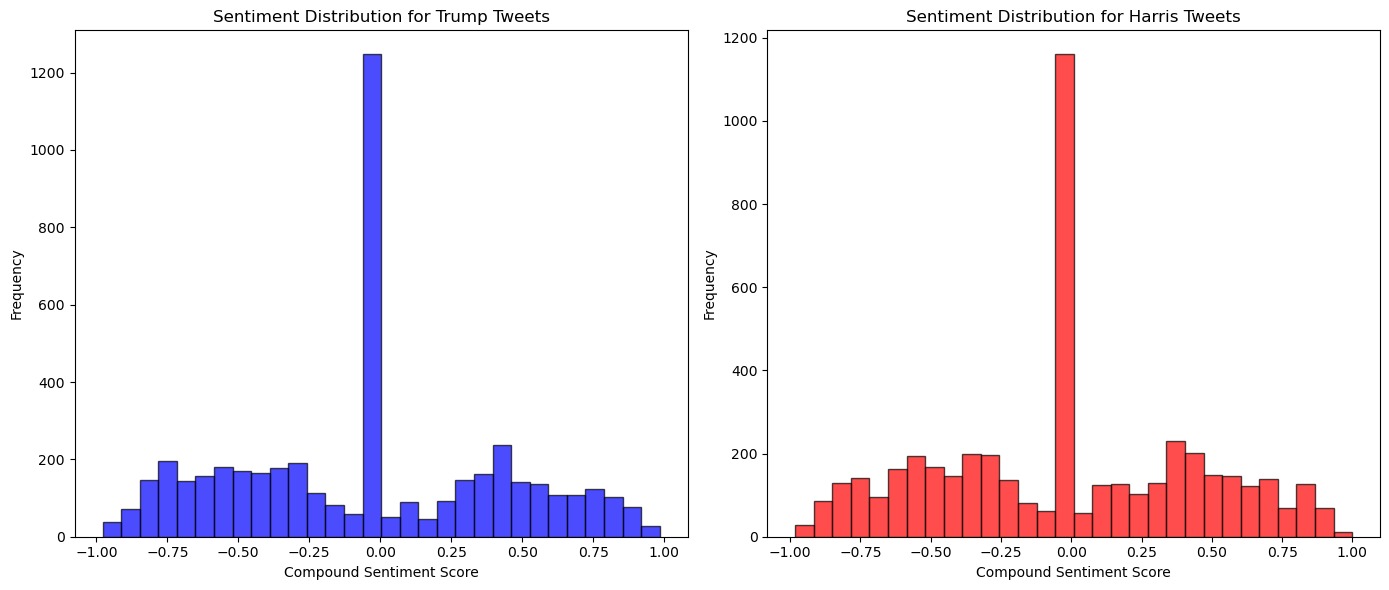

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load your cleaned CSV files
trump_df = pd.read_csv('/Users/soniakhamitkar/Documents/Sentiment Analysis/data/Cleaned_Trump_Tweets.csv')  
harris_df = pd.read_csv('/Users/soniakhamitkar/Documents/Sentiment Analysis/data/Cleaned_Harris_Tweets.csv')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get VADER sentiment scores
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(str(text))
    return sentiment['compound'], sentiment['pos'], sentiment['neu'], sentiment['neg']

# Apply sentiment analysis to the cleaned tweets
trump_df[['Compound', 'Positive', 'Neutral', 'Negative']] = trump_df['Cleaned_Tweet'].apply(
    lambda x: pd.Series(get_sentiment_scores(x))
)
harris_df[['Compound', 'Positive', 'Neutral', 'Negative']] = harris_df['Cleaned_Tweet'].apply(
    lambda x: pd.Series(get_sentiment_scores(x))
)

# Plot sentiment distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Trump Sentiment Distribution
axes[0].hist(trump_df['Compound'], bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Sentiment Distribution for Trump Tweets')
axes[0].set_xlabel('Compound Sentiment Score')
axes[0].set_ylabel('Frequency')

# Harris Sentiment Distribution
axes[1].hist(harris_df['Compound'], bins=30, color='red', alpha=0.7, edgecolor='black')
axes[1].set_title('Sentiment Distribution for Harris Tweets')
axes[1].set_xlabel('Compound Sentiment Score')
axes[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

## 📌 Sentiment Bar Graphs

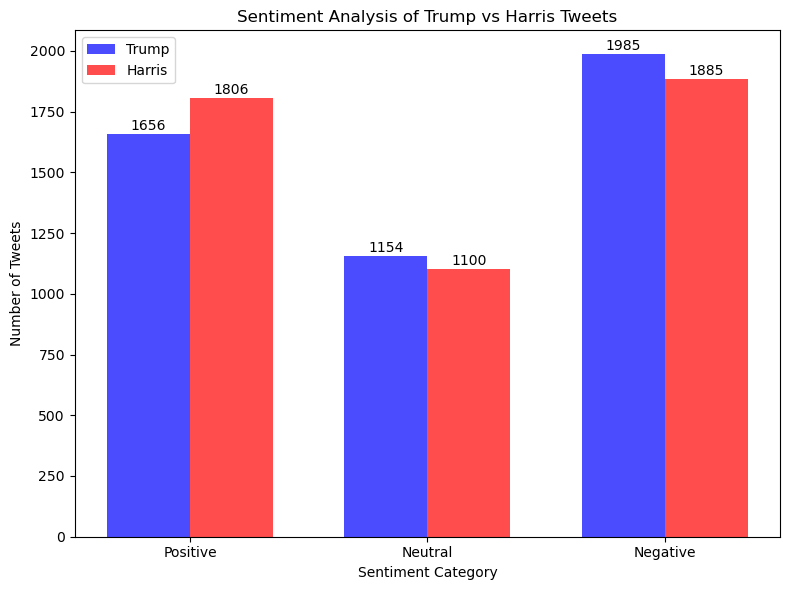

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the cleaned tweet datasets
trump_df = pd.read_csv('/Users/soniakhamitkar/Documents/Sentiment Analysis/data/Cleaned_Trump_Tweets.csv')  
harris_df = pd.read_csv('/Users/soniakhamitkar/Documents/Sentiment Analysis/data/Cleaned_Harris_Tweets.csv')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment using VADER
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(str(text))  # Convert to string in case of NaN
    return sentiment["compound"], sentiment["pos"], sentiment["neu"], sentiment["neg"]

# Apply sentiment analysis to the cleaned tweets
trump_df[['Compound', 'Positive', 'Neutral', 'Negative']] = trump_df['Cleaned_Tweet'].apply(
    lambda x: pd.Series(get_sentiment_scores(x))
)
harris_df[['Compound', 'Positive', 'Neutral', 'Negative']] = harris_df['Cleaned_Tweet'].apply(
    lambda x: pd.Series(get_sentiment_scores(x))
)

# Count occurrences of each sentiment category
trump_sentiment_counts = {
    "Positive": np.sum(trump_df["Compound"] > 0),
    "Neutral": np.sum(trump_df["Compound"] == 0),
    "Negative": np.sum(trump_df["Compound"] < 0),
}

harris_sentiment_counts = {
    "Positive": np.sum(harris_df["Compound"] > 0),
    "Neutral": np.sum(harris_df["Compound"] == 0),
    "Negative": np.sum(harris_df["Compound"] < 0),
}

# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 6))
categories = ["Positive", "Neutral", "Negative"]
trump_values = [trump_sentiment_counts[cat] for cat in categories]
harris_values = [harris_sentiment_counts[cat] for cat in categories]

x = np.arange(len(categories))  # Label locations
width = 0.35  # Bar width

# Create bars for Trump and Harris
bars1 = ax.bar(x - width/2, trump_values, width, label="Trump", color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, harris_values, width, label="Harris", color='red', alpha=0.7)

# Add numerical values on top of bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, str(height), ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, str(height), ha='center', va='bottom')

# Labels and Title
ax.set_xlabel("Sentiment Category")
ax.set_ylabel("Number of Tweets")
ax.set_title("Sentiment Analysis of Trump vs Harris Tweets")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

## 📌 Sentiment Breakdown (Pie Chart)

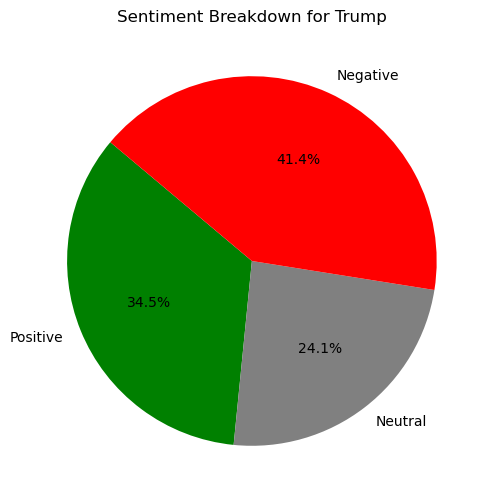

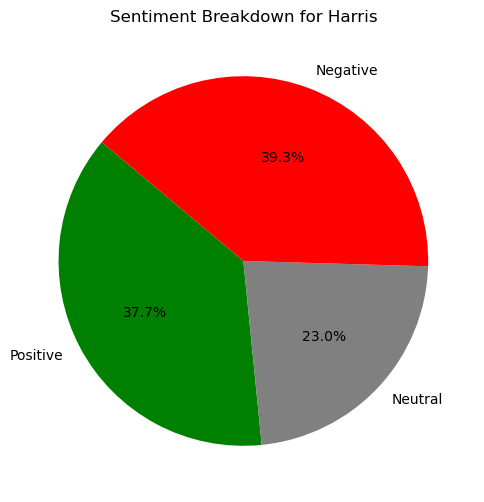

In [38]:
# Pie chart for sentiment breakdown
def plot_sentiment_pie(df, name):
    sentiment_counts = [
        sum(df['Compound'] > 0),
        sum(df['Compound'] == 0),
        sum(df['Compound'] < 0)
    ]
    labels = ['Positive', 'Neutral', 'Negative']
    colors = ['green', 'grey', 'red']
    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(f"Sentiment Breakdown for {name}")
    plt.show()

plot_sentiment_pie(trump_df, "Trump")
plot_sentiment_pie(harris_df, "Harris")

## 📌 Sentiment Line Graph

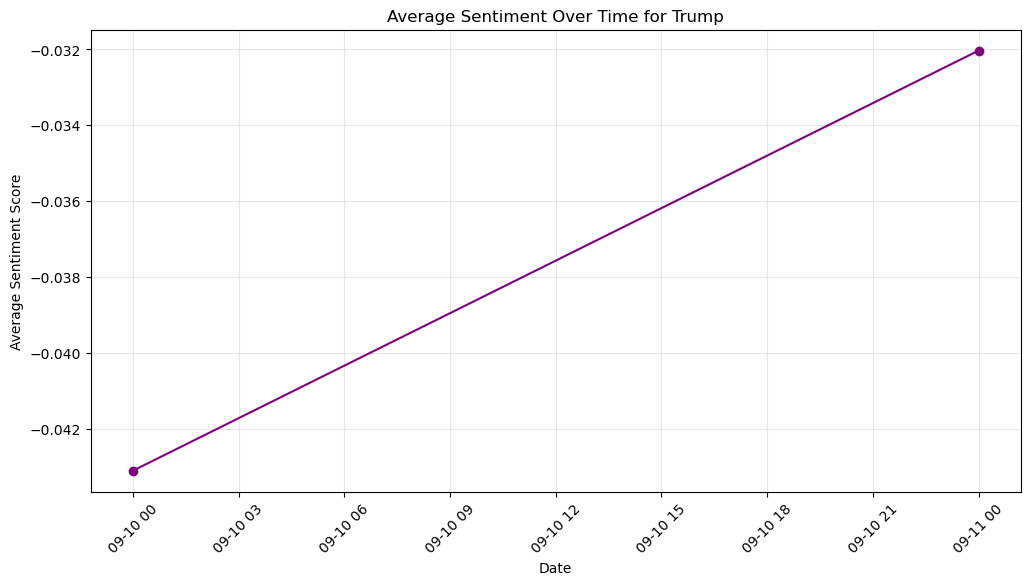

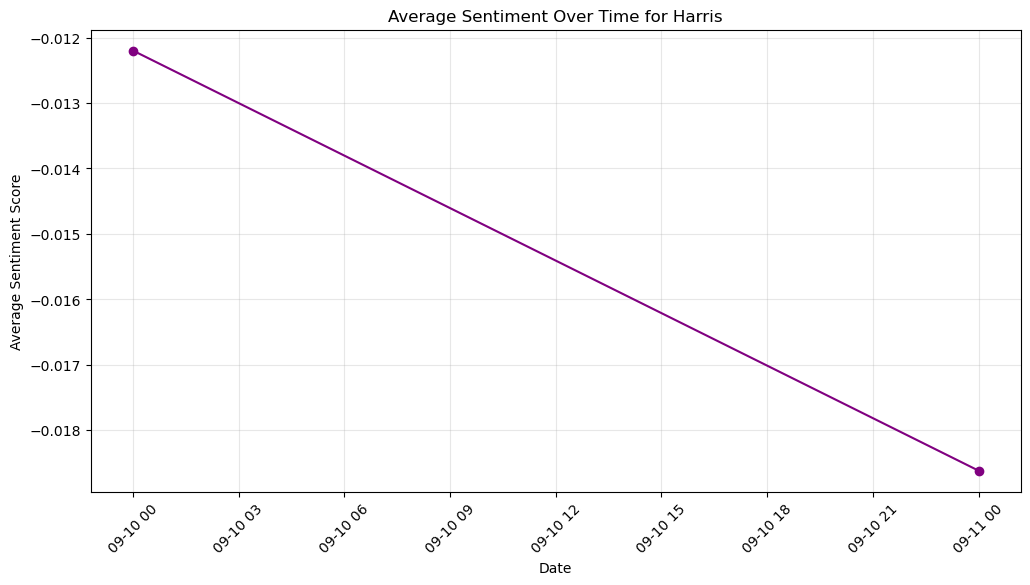

In [40]:
# Convert Created at to datetime and group by date
trump_df['Created at'] = pd.to_datetime(trump_df['Created at'])
harris_df['Created at'] = pd.to_datetime(harris_df['Created at'])

def plot_sentiment_over_time(df, name):
    sentiment_over_time = df.groupby(df['Created at'].dt.date)['Compound'].mean()
    plt.figure(figsize=(12, 6))
    plt.plot(sentiment_over_time.index, sentiment_over_time.values, marker='o', color='purple')
    plt.title(f"Average Sentiment Over Time for {name}")
    plt.xlabel("Date")
    plt.ylabel("Average Sentiment Score")
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.show()

plot_sentiment_over_time(trump_df, "Trump")
plot_sentiment_over_time(harris_df, "Harris")

## 📌 Sentiment Word Clouds

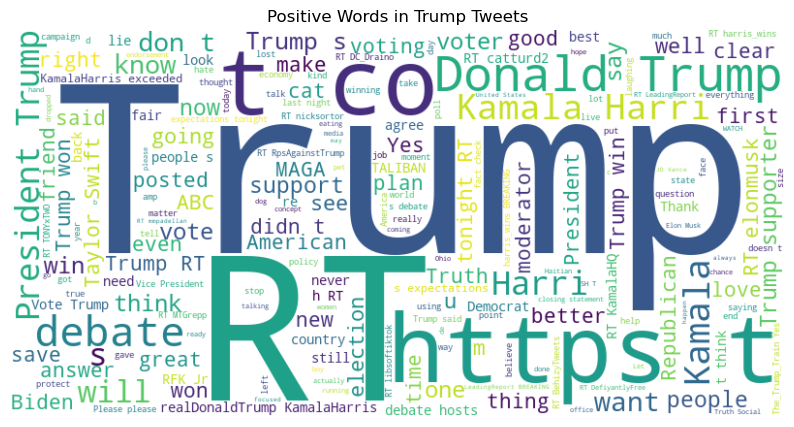

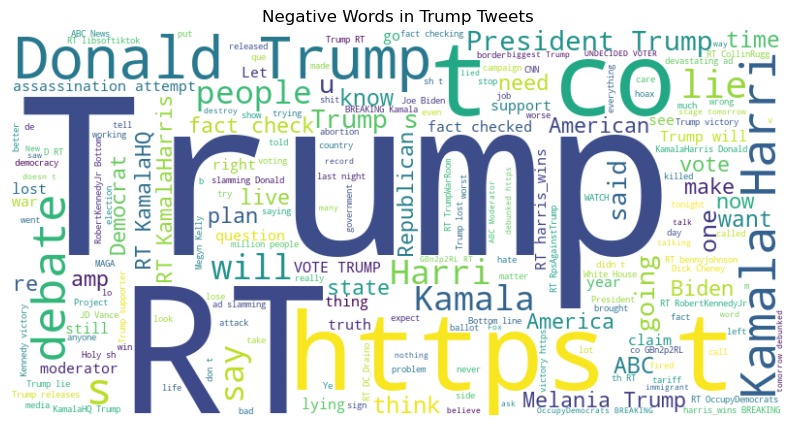

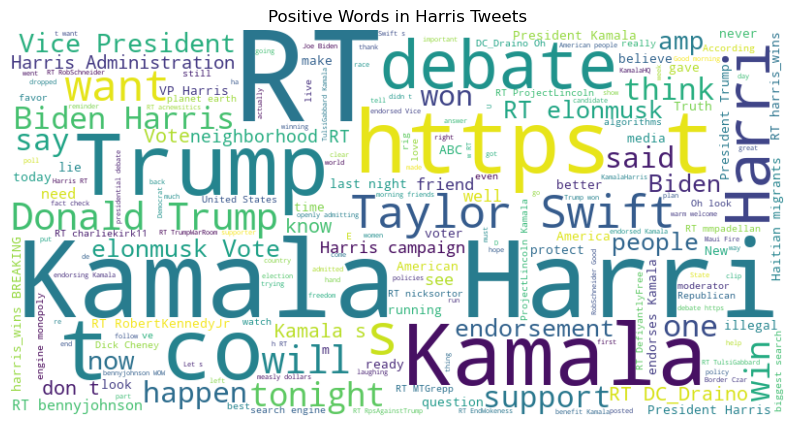

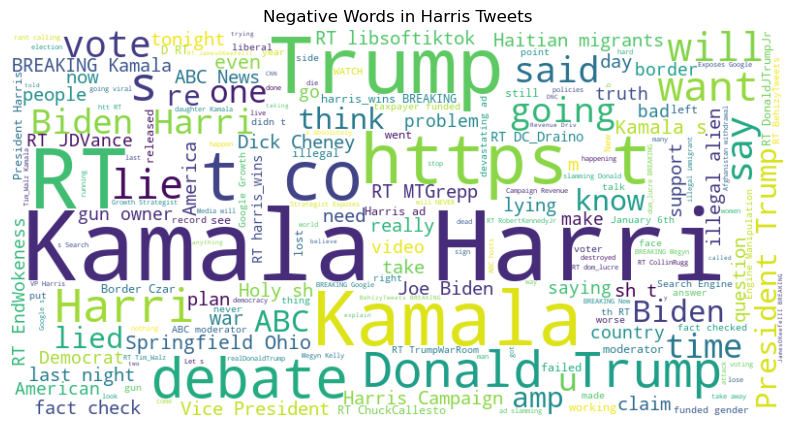

In [42]:
from wordcloud import WordCloud

def plot_wordcloud(df, sentiment, name):
    if sentiment == 'Positive':
        text = " ".join(df[df['Compound'] > 0]['Tweet'])
    elif sentiment == 'Neutral':
        text = " ".join(df[df['Compound'] == 0]['Tweet'])
    else:
        text = " ".join(df[df['Compound'] < 0]['Tweet'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment} Words in {name} Tweets")
    plt.show()

plot_wordcloud(trump_df, 'Positive', 'Trump')
plot_wordcloud(trump_df, 'Negative', 'Trump')
plot_wordcloud(harris_df, 'Positive', 'Harris')
plot_wordcloud(harris_df, 'Negative', 'Harris')

In [44]:
from IPython.display import Markdown, display

# Define the findings in markdown format
findings_markdown = """
# Sentiment Analysis Insights

## 1. Sentiment Distribution Histograms
- **Observation**:
  - Both Trump and Harris datasets show a significant spike at **0 (neutral sentiment)**.
  - Positive and negative sentiment scores are symmetrically spread around the neutral spike.
  - Trump tweets show slightly higher density in the **negative sentiment range** compared to Harris tweets.
- **Insights**:
  - High proportion of neutral tweets reflects factual or non-opinionated commentary.
  - Balanced polarities indicate polarizing opinions about both individuals.

## 2. Sentiment Analysis Bar Chart
- **Observation**:
  - **Positive Tweets**: Harris has more positive tweets (1,806) than Trump (1,656).
  - **Neutral Tweets**: Trump has slightly more neutral tweets (1,154) than Harris (1,100).
  - **Negative Tweets**: Trump has more negative tweets (1,985) compared to Harris (1,885).
- **Insights**:
  - Harris has a relatively more favorable public perception.
  - Trump faces more public criticism in this dataset.

## 3. Sentiment Breakdown Pie Charts
- **Observation**:
  - **Trump**: 41.4% negative, 24.1% neutral, 34.5% positive.
  - **Harris**: 39.3% negative, 23% neutral, 37.7% positive.
- **Insights**:
  - Harris skews slightly more positive, while Trump has a larger share of negative sentiment.

## 4. Average Sentiment Over Time
- **Observation**:
  - **Trump**: Sentiment improves slightly over time, from -0.042 to -0.032.
  - **Harris**: Sentiment declines slightly over time, from -0.012 to -0.018.
- **Insights**:
  - Trump shows slight improvement in public sentiment over time.
  - Harris experiences a minor decline, possibly reflecting emerging criticism or controversies.

## 5. Word Clouds (Positive and Negative Words)
- **Positive Word Clouds**:
  - **Trump**: Words like "debate," "Trump," "great," and "supporter" highlight positivity surrounding the debate and his supporters.
  - **Harris**: Words like "Kamala," "Harris," "won," and "support" emphasize support for her performance.
- **Negative Word Clouds**:
  - **Trump**: Words like "lie," "debate," "attack," and "worst" suggest criticism tied to dishonesty and conflicts in the debate.
  - **Harris**: Words like "lied," "illegal," "debate," and "Trump" highlight criticism related to dishonesty and political themes.
- **Insights**:
  - Positive words focus on debate performance and support for both individuals.
  - Negative words reflect criticism and controversies tied to debates and political actions.

---

## Key Takeaways
1. **Public Perception**:
   - Harris enjoys a slightly more positive public perception than Trump.
   - Trump faces higher levels of criticism as indicated by the higher proportion of negative sentiment.

2. **Debate Impact**:
   - Debates play a crucial role in shaping both positive and negative sentiment for both figures.

3. **Temporal Trends**:
   - Trump’s sentiment improves slightly over time, while Harris’s sentiment shows a slight decline.

4. **Polarization**:
   - Balanced distribution of positive and negative sentiment indicates polarized opinions about both individuals.
"""

# Display the markdown in the Jupyter notebook
display(Markdown(findings_markdown))


# Sentiment Analysis Insights

## 1. Sentiment Distribution Histograms
- **Observation**:
  - Both Trump and Harris datasets show a significant spike at **0 (neutral sentiment)**.
  - Positive and negative sentiment scores are symmetrically spread around the neutral spike.
  - Trump tweets show slightly higher density in the **negative sentiment range** compared to Harris tweets.
- **Insights**:
  - High proportion of neutral tweets reflects factual or non-opinionated commentary.
  - Balanced polarities indicate polarizing opinions about both individuals.

## 2. Sentiment Analysis Bar Chart
- **Observation**:
  - **Positive Tweets**: Harris has more positive tweets (1,806) than Trump (1,656).
  - **Neutral Tweets**: Trump has slightly more neutral tweets (1,154) than Harris (1,100).
  - **Negative Tweets**: Trump has more negative tweets (1,985) compared to Harris (1,885).
- **Insights**:
  - Harris has a relatively more favorable public perception.
  - Trump faces more public criticism in this dataset.

## 3. Sentiment Breakdown Pie Charts
- **Observation**:
  - **Trump**: 41.4% negative, 24.1% neutral, 34.5% positive.
  - **Harris**: 39.3% negative, 23% neutral, 37.7% positive.
- **Insights**:
  - Harris skews slightly more positive, while Trump has a larger share of negative sentiment.

## 4. Average Sentiment Over Time
- **Observation**:
  - **Trump**: Sentiment improves slightly over time, from -0.042 to -0.032.
  - **Harris**: Sentiment declines slightly over time, from -0.012 to -0.018.
- **Insights**:
  - Trump shows slight improvement in public sentiment over time.
  - Harris experiences a minor decline, possibly reflecting emerging criticism or controversies.

## 5. Word Clouds (Positive and Negative Words)
- **Positive Word Clouds**:
  - **Trump**: Words like "debate," "Trump," "great," and "supporter" highlight positivity surrounding the debate and his supporters.
  - **Harris**: Words like "Kamala," "Harris," "won," and "support" emphasize support for her performance.
- **Negative Word Clouds**:
  - **Trump**: Words like "lie," "debate," "attack," and "worst" suggest criticism tied to dishonesty and conflicts in the debate.
  - **Harris**: Words like "lied," "illegal," "debate," and "Trump" highlight criticism related to dishonesty and political themes.
- **Insights**:
  - Positive words focus on debate performance and support for both individuals.
  - Negative words reflect criticism and controversies tied to debates and political actions.

---

## Key Takeaways
1. **Public Perception**:
   - Harris enjoys a slightly more positive public perception than Trump.
   - Trump faces higher levels of criticism as indicated by the higher proportion of negative sentiment.

2. **Debate Impact**:
   - Debates play a crucial role in shaping both positive and negative sentiment for both figures.

3. **Temporal Trends**:
   - Trump’s sentiment improves slightly over time, while Harris’s sentiment shows a slight decline.

4. **Polarization**:
   - Balanced distribution of positive and negative sentiment indicates polarized opinions about both individuals.
